# Initialization

In [1]:
rm(list = ls())

library(data.table)
library(tidyverse)
library(rJava)
library(RNetLogo)

library(lhs)  # For maximin Latin hypercube sampling
library(ggplot2)
library(plotly)  # For beautiful plotting
library(caret)
library(randomForest)
library(factoextra)
library(e1071)
library(TSrepr)  # for evaluating predictive power

require(gridExtra)

options(warn = -1)

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.2.1     v purrr   0.3.3
v tibble  2.1.3     v dplyr   0.8.3
v tidyr   1.0.0     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::between()   masks data.table::between()
x dplyr::filter()    masks stats::filter()
x dplyr::first()     masks data.table::first()
x purrr::flatten()   masks jsonlite::flatten()
x dplyr::lag()       masks stats::lag()
x dplyr::last()      masks data.table::last()
x purrr::transpose() masks data.table::transpose()
Loading required package: igraph

Attaching package: 'igraph'

The following objects are masked from 'package:dplyr':

    as_data_frame, groups, union

The following objects are masked from 'package:purrr':

    compose, simplify

The following object is masked from 'package:tidyr':

    crossing

The following object is masked from 'package:tibble':

    as_data_fram

In [2]:
folder.path = "C:/Users/paslanpatir/Desktop/TEZ_v2/"
data.path = paste0(folder.path,"data/")

nl.model.1 = "Segregation"
model.type.1 = ifelse(nl.model.1 == "Segregation", "basic", "dummy")
output.folder.1 = paste0("outputs/outputs_50_100/outputs_SampleRef_Basic")
outputs.path.1 = paste0(folder.path,output.folder.1,"/")
feature_names.1 = c("density", "%-similar-wanted")

nl.model.2 = ifelse(nl.model.1 == "Segregation", "Segregation_Dummy", "Segregation")
model.type.2 = ifelse(model.type.1 == "basic", "dummy", "basic")
output.folder.2 = paste0("outputs/outputs_50_100/outputs_SampleRef_Dummy")
outputs.path.2 = paste0(folder.path,output.folder.2,"/")
feature_names.2 = c("density", "%-similar-wanted", "budget-multiplier-dummy", "density-multiplier-dummy", "noise-dummy", "tick-limit")

In [3]:
nl.model.3 = "Segregation_Dummy"
model.type.3 = ifelse(nl.model.3 == "Segregation_Dummy", "dummy", "basic")
output.folder.3 = paste0("outputs_FeatSel_3_4_7_8_20_ElimBeginning_2020-03-04")
outputs.path.3 = paste0(folder.path,output.folder.3,"/")
feature_names.3 = c("density", "%-similar-wanted", "budget-multiplier-dummy", "density-multiplier-dummy", "noise-dummy", "tick-limit")  

In [4]:
nl.model.4 = "Segregation_Dummy"
model.type.4 = ifelse(nl.model.4 == "Segregation_Dummy", "dummy", "basic")
output.folder.4 = paste0("outputs_FeatSel_3_4_7_8_20_ElimEnd_2020-03-04")
outputs.path.4  = paste0(folder.path,output.folder.4,"/")
feature_names.4 = c("density", "%-similar-wanted", "budget-multiplier-dummy", "density-multiplier-dummy", "noise-dummy", "tick-limit")  

# OneShot

In [5]:
#### OneShot ####
#### Model.1 ####
one_shot_path.1 = paste0(outputs.path.1,"oneshot/")

obb_error_oneshot.1 = fread(paste0(one_shot_path.1,model.type.1,"_obb_error_oneshot_all",".csv"))
performance_table_oneshot.1 = fread(paste0(one_shot_path.1,model.type.1,"_performance_table_oneshot",".csv"))
#predictedLabels_oneshot.1 = fread(paste0(one_shot_path.1,model.type.1,"_predictedLabels_oneshot_all",".csv"))

performance_table_oneshot.1 = performance_table_oneshot.1[size == 100]

performance_molten_oneshot.1 <- melt(data = performance_table_oneshot.1
                             , id.vars = c('iter',"seed","rep","size"))
setnames(performance_molten_oneshot.1, c("variable","value"),c("errortype","errorvalue"))

test_ave_performance_molten_oneshot.1 = performance_molten_oneshot.1[,.(errorvalue = mean(errorvalue)),.(iter,seed,rep,errortype)]

In [6]:
#### Model.2 ####
one_shot_path.2 = paste0(outputs.path.2,"oneshot/")

obb_error_oneshot.2         = fread(paste0(one_shot_path.2,model.type.2,"_obb_error_oneshot_all",".csv"))
performance_table_oneshot.2 = fread(paste0(one_shot_path.2,model.type.2,"_performance_table_oneshot",".csv"))
#predictedLabels_oneshot.2   = fread(paste0(one_shot_path.2,model.type.2,"_predictedLabels_oneshot_all",".csv")) # size

performance_table_oneshot.2 = performance_table_oneshot.2[size == 100]
performance_molten_oneshot.2 <- melt(data = performance_table_oneshot.2
                             , id.vars = c('iter',"seed","rep","size"))
setnames(performance_molten_oneshot.2, c("variable","value"),c("errortype","errorvalue"))

test_ave_performance_molten_oneshot.2 = performance_molten_oneshot.2[,.(errorvalue = mean(errorvalue)),.(iter,seed,rep,errortype)]

# Random Sampling

In [7]:
#### Random Sampling ####
#### Model.1 ####
Rd_path.1 = paste0(outputs.path.1,"Rd/")

obb_error_Rd.1              = fread(paste0(Rd_path.1,model.type.1,"_obb_error_Rd",".csv"))
performance_table_Rd.1      = fread(paste0(Rd_path.1,model.type.1,"_performance_table_Rd",".csv"))
#predictedLabels_Rd.1        = fread(paste0(Rd_path.1,model.type.1,"_predictedLabels_table_Rd",".csv"))
FinalTrainData_Rd.1         = fread(paste0(Rd_path.1,model.type.1,"_FinalTrainData_Rd",".csv"))
train_candidates_Rd.1       = fread(paste0(Rd_path.1,model.type.1,"_train_candidates_table_Rd",".csv"))

performance_table_Rd.1 = performance_table_Rd.1[size == 100]
performance_molten_Rd_seq.1 <- melt(data = performance_table_Rd.1
                             , id.vars = c('iter',"seed","rep","size"))
performance_molten_Rd_seq.1[, iter := iter - 1]
setnames(performance_molten_Rd_seq.1, c("variable","value"),c("errortype","errorvalue"))

test_ave_performance_molten_Rd_seq.1 = performance_molten_Rd_seq.1[,.(errorvalue = mean(errorvalue)),.(iter,seed,rep,errortype)]

In [8]:
#### Model.2 ####
Rd_path.2 = paste0(outputs.path.2,"Rd/")

obb_error_Rd.2              = fread(paste0(Rd_path.2,model.type.2,"_obb_error_Rd",".csv"))
performance_table_Rd.2      = fread(paste0(Rd_path.2,model.type.2,"_performance_table_Rd",".csv"))
#predictedLabels_Rd.2        = fread(paste0(Rd_path.2,model.type.2,"_predictedLabels_table_Rd",".csv"))
FinalTrainData_Rd.2         = fread(paste0(Rd_path.2,model.type.2,"_FinalTrainData_Rd",".csv"))
train_candidates_Rd.2       = fread(paste0(Rd_path.2,model.type.2,"_train_candidates_table_Rd",".csv"))

performance_table_Rd.2 = performance_table_Rd.2[size == 100]
performance_molten_Rd_seq.2 <- melt(data = performance_table_Rd.2
                             , id.vars = c('iter',"seed","rep","size"))
performance_molten_Rd_seq.2[, iter := iter - 1]
setnames(performance_molten_Rd_seq.2, c("variable","value"),c("errortype","errorvalue"))

test_ave_performance_molten_Rd_seq.2 = performance_molten_Rd_seq.2[,.(errorvalue = mean(errorvalue)),.(iter,seed,rep,errortype)]

# Ad_sd Sampling

In [9]:
#### Adaptive Sampling ####
#### Model.1 ####
Ad_path.1 = paste0(outputs.path.1,"Ad_sd/")

obb_error_Ad.1              = fread(paste0(Ad_path.1,model.type.1,"_obb_error_Ad",".csv"))
performance_table_Ad.1      = fread(paste0(Ad_path.1,model.type.1,"_performance_table_Ad",".csv"))
importance_Ad.1             = fread(paste0(Ad_path.1,model.type.1,"_importance_table_Ad",".csv"))
FinalTrainData_Ad.1         = fread(paste0(Ad_path.1,model.type.1,"_FinalTrainData_Ad",".csv"))
train_candidates_Ad.1       = fread(paste0(Ad_path.1,model.type.1,"_train_candidates_table_Ad",".csv"))

performance_table_Ad.1 = performance_table_Ad.1[size == 100]
performance_molten_Ad_seq.1 <- melt(data = performance_table_Ad.1
                             , id.vars = c('iter',"seed","rep","size"))
performance_molten_Ad_seq.1[, iter := iter - 1]
setnames(performance_molten_Ad_seq.1, c("variable","value"),c("errortype","errorvalue"))

test_ave_performance_molten_Ad_seq.1 = performance_molten_Ad_seq.1[,.(errorvalue = mean(errorvalue)),.(iter,seed,rep,errortype)]

importance_Ad.1[, iter_no := iter_no - 1]
group_importance_Ad.1 = melt(data = importance_Ad.1, id.vars = c("seed","rep","iter_no"), measure.vars = feature_names.1) 
setnames(group_importance_Ad.1, c("variable"),c("feature"))

In [10]:
#### Model.2 ####
Ad_path.2 = paste0(outputs.path.2,"Ad_sd/")

obb_error_Ad.2              = fread(paste0(Ad_path.2,model.type.2,"_obb_error_Ad",".csv"))
performance_table_Ad.2      = fread(paste0(Ad_path.2,model.type.2,"_performance_table_Ad",".csv"))
importance_Ad.2             = fread(paste0(Ad_path.2,model.type.2,"_importance_table_Ad",".csv"))
FinalTrainData_Ad.2         = fread(paste0(Ad_path.2,model.type.2,"_FinalTrainData_Ad",".csv"))
train_candidates_Ad.2       = fread(paste0(Ad_path.2,model.type.2,"_train_candidates_table_Ad",".csv"))

performance_table_Ad.2 = performance_table_Ad.2[size == 100]
performance_molten_Ad_seq.2 <- melt(data = performance_table_Ad.2
                             , id.vars = c('iter',"seed","rep","size"))
performance_molten_Ad_seq.2[, iter := iter - 1]
setnames(performance_molten_Ad_seq.2, c("variable","value"),c("errortype","errorvalue"))

test_ave_performance_molten_Ad_seq.2 = performance_molten_Ad_seq.2[,.(errorvalue = mean(errorvalue)),.(iter,seed,rep,errortype)]

importance_Ad.2[, iter_no := iter_no - 1]
group_importance_Ad.2 = melt(data = importance_Ad.2, id.vars = c("seed","rep","iter_no"), measure.vars = feature_names.2) 
setnames(group_importance_Ad.2, c("variable"),c("feature"))

# AdFe_sd Sampling & Elimination

## Elimination : Beginning_1_1_1_1

In [11]:
#### Model.3 #### Only feature elimination part
#### Ad_sd ####

obb_error_Ad.3              = fread(paste0(outputs.path.3,"dummy","_obb_error_AdFe_sd",".csv"))
performance_table_Ad.3      = fread(paste0(outputs.path.3,"dummy","_performance_table_AdFe_sd",".csv"))
importance_Ad.3             = fread(paste0(outputs.path.3,"dummy","_importance_table_AdFe_sd",".csv"))
train_candidates_Ad.3       = fread(paste0(outputs.path.3,"dummy","_train_candidates_table_AdFe_sd",".csv"))
iteration_history_Ad.3      = fread(paste0(outputs.path.3,"dummy","_iteration_history_AdFe_sd",".csv"))

performance_molten_Ad_seq.3 <- melt(data = performance_table_Ad.3
                             , id.vars = c('iter',"seed","rep","size"))
performance_molten_Ad_seq.3[, iter := iter - 1]
setnames(performance_molten_Ad_seq.3, c("variable","value"),c("errortype","errorvalue"))

test_ave_performance_molten_Ad_seq.3 = performance_molten_Ad_seq.3[,.(errorvalue = mean(errorvalue)),.(iter,seed,rep,errortype)]

importance_Ad.3[, iter_no := iter_no - 1]
group_importance_Ad.3 = melt(data = importance_Ad.3, id.vars = c("seed","rep","iter_no"), measure.vars = feature_names.3) 
setnames(group_importance_Ad.3, c("variable"),c("feature"))

iteration_history_Ad.3 = data.table(unique(iteration_history_Ad.3[,.(iter_no,IsFeatureEliminated,IsDataSelected)])
                                    ,"Type" = "Begin_1_1_1_1")

## Elimination : End_1_1_1_1

In [12]:
#### Model.4 #### Only feature elimination part
#### Ad_sd ####

obb_error_Ad.4              = fread(paste0(outputs.path.4,"dummy","_obb_error_AdFe_sd",".csv"))
performance_table_Ad.4      = fread(paste0(outputs.path.4,"dummy","_performance_table_AdFe_sd",".csv"))
importance_Ad.4             = fread(paste0(outputs.path.4,"dummy","_importance_table_AdFe_sd",".csv"))
train_candidates_Ad.4       = fread(paste0(outputs.path.4,"dummy","_train_candidates_table_AdFe_sd",".csv"))
iteration_history_Ad.4      = fread(paste0(outputs.path.4,"dummy","_iteration_history_AdFe_sd",".csv"))

performance_molten_Ad_seq.4 <- melt(data = performance_table_Ad.4
                             , id.vars = c('iter',"seed","rep","size"))
performance_molten_Ad_seq.4[, iter := iter - 1]
setnames(performance_molten_Ad_seq.4, c("variable","value"),c("errortype","errorvalue"))

test_ave_performance_molten_Ad_seq.4 = performance_molten_Ad_seq.4[,.(errorvalue = mean(errorvalue)),.(iter,seed,rep,errortype)]

importance_Ad.4[, iter_no := iter_no - 1]
group_importance_Ad.4 = melt(data = importance_Ad.4, id.vars = c("seed","rep","iter_no"), measure.vars = feature_names.4) 
setnames(group_importance_Ad.4, c("variable"),c("feature"))

iteration_history_Ad.4 = data.table(unique(iteration_history_Ad.4[,.(iter_no,IsFeatureEliminated,IsDataSelected)])
                                    ,"Type" = "End_1_1_1_1")

# Comparisons for Elimination

In [13]:
seed.focus = c(3,4,7,8,20)

## importance

In [14]:
importance_compare = rbind( data.table(group_importance_Ad.1,type = "1basic_Ad_sd")
                           ,data.table(group_importance_Ad.2,type = "2dummy_Ad_sd")
                           ,data.table(group_importance_Ad.3,type = "3Begin_1_1_1_1")
                           ,data.table(group_importance_Ad.4,type = "6End_1_1_1_1"))
importance_compare = importance_compare[seed %in% seed.focus]

ave_importance_compare = importance_compare[,.(mean_value = mean(value, na.rm = TRUE)),.(iter_no,feature,type)]

In [15]:
elimination_history = rbind(iteration_history_Ad.3[IsFeatureEliminated==1, .(type = "3Begin_1_1_1_1",iter_no)]
                           ,iteration_history_Ad.4[IsFeatureEliminated==1, .(type = "6End_1_1_1_1",iter_no)])

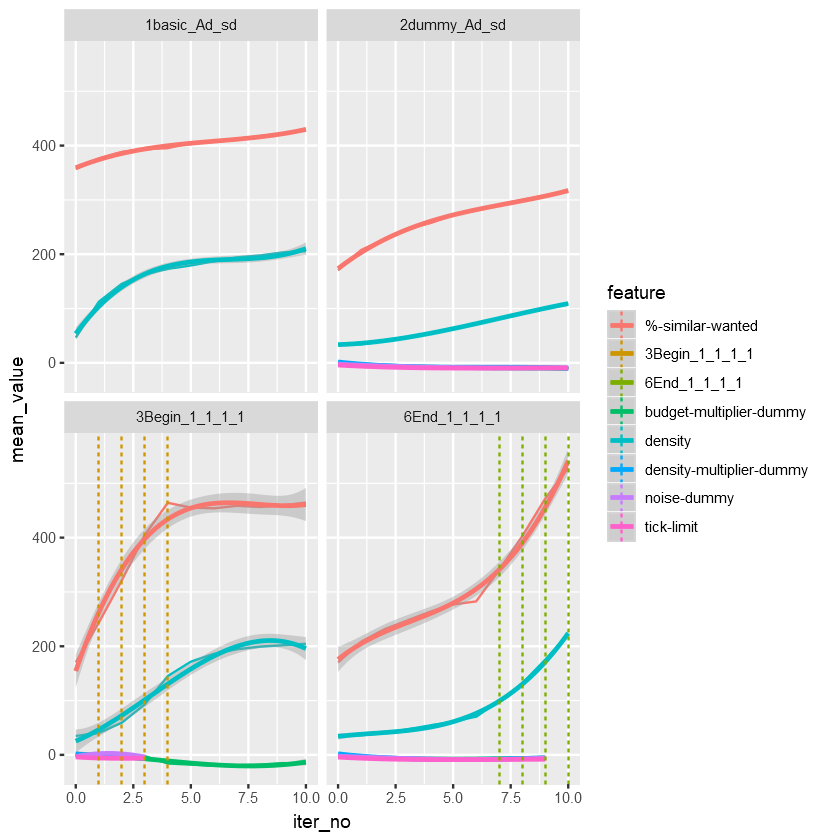

In [16]:
ave_importance.plot = ggplot(ave_importance_compare, aes(x = iter_no, y = mean_value, group=feature, col=feature)) + 
                          geom_line() +
                          facet_wrap(~type) +     
                          geom_smooth(method = "gam", formula = y ~ poly(x, 3)) +
                          geom_vline(data = elimination_history, aes(xintercept = iter_no,color = type), linetype = "dashed" )
                          #geom_vline(xintercept = iteration_history_Ad.3[IsFeatureEliminated==1]$iter_no + 1, linetype = "dashed") 
ave_importance.plot

In [17]:
# density'nin elendiği caseler
unique(importance_Ad.3[is.na(`budget-multiplier-dummy`) == F & iter_no > 4,.(seed,rep) ])

seed,rep
<int>,<int>
4,1
4,3
4,4
4,6
4,7
4,8
4,9
4,10


*sonlara doğru daha çok data pointle importance'lar biraz daha belirginleşiyor.*

In [18]:
importance_Ad.3[is.na(`budget-multiplier-dummy`) == F & seed ==4 & rep ==1]

seed,rep,iter_no,density,%-similar-wanted,budget-multiplier-dummy,density-multiplier-dummy,noise-dummy,tick-limit
<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4,1,0,19.79409,236.6809,30.768015,5.4663462,-4.238184,8.228182
4,1,1,15.13361,216.1295,7.000343,-0.2588898,NA,6.622819
4,1,2,26.04325,256.5003,7.972785,NA,NA,2.896632
4,1,3,52.64649,361.5021,-2.988612,NA,NA,NA
4,1,4,NA,402.5478,-13.389551,NA,NA,NA
4,1,5,NA,402.2223,-15.376004,NA,NA,NA
4,1,6,NA,400.1158,-37.760872,NA,NA,NA
4,1,7,NA,441.7604,-42.586679,NA,NA,NA
4,1,8,NA,420.9218,-28.261080,NA,NA,NA


In [19]:
importance_Ad.3[is.na(`budget-multiplier-dummy`) == F & seed ==4 & rep ==2]

seed,rep,iter_no,density,%-similar-wanted,budget-multiplier-dummy,density-multiplier-dummy,noise-dummy,tick-limit
<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4,2,0,25.39870,230.7189,23.074045,5.799803,-6.237194,0.1298083
4,2,1,22.42035,257.2517,14.693801,-12.675867,NA,1.8236096
4,2,2,17.64792,370.6825,-1.961270,-5.467079,NA,NA
4,2,3,27.09058,432.6094,-5.188931,NA,NA,NA


In [20]:
importance_Ad.4[is.na(`budget-multiplier-dummy`) == F & seed ==4 & rep ==1]

seed,rep,iter_no,density,%-similar-wanted,budget-multiplier-dummy,density-multiplier-dummy,noise-dummy,tick-limit
<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4,1,0,19.794088,236.6809,30.768015,5.466346,-4.238184,8.2281823
4,1,1,8.624463,215.8917,10.958071,-9.294637,-1.526313,2.6829141
4,1,2,24.033052,248.5943,11.182472,-12.793898,-5.327776,12.5321843
4,1,3,18.431247,255.3984,2.505388,-7.108649,-11.243184,0.9335949
4,1,4,14.552012,281.6961,-11.948851,-11.328277,-9.188236,-3.3871850
4,1,5,19.673726,276.9376,-7.455953,-10.710743,-4.980505,-8.3840925
4,1,6,19.281563,289.2580,-7.962755,-6.179566,-8.301211,-7.2244409
4,1,7,24.779167,327.1134,-7.583541,-5.866865,NA,-8.6100625


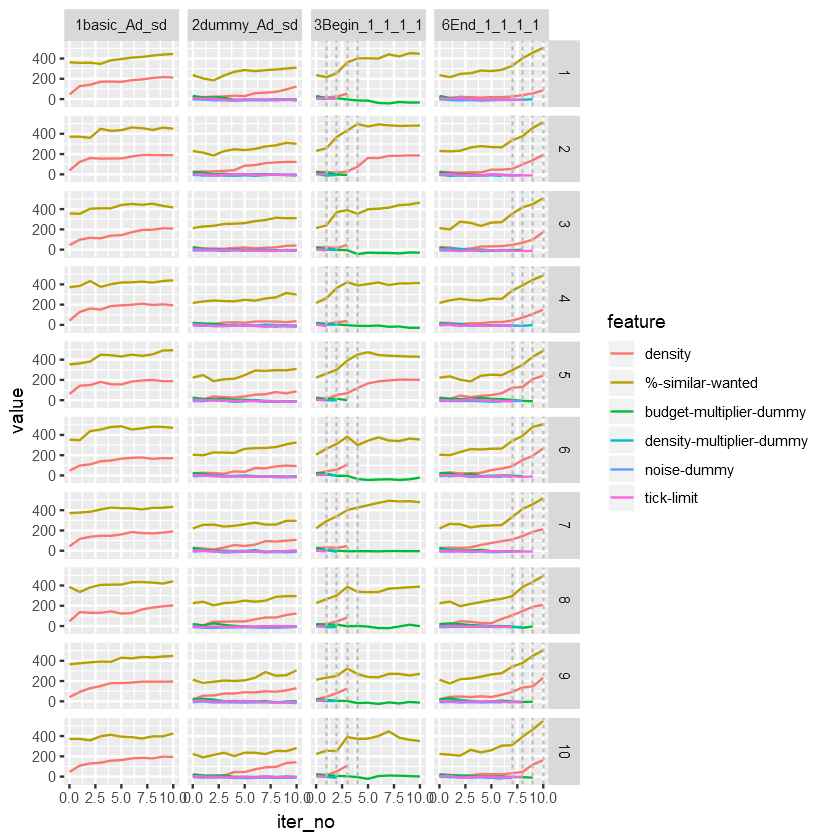

In [21]:
ggplot(importance_compare[seed == 4], aes(x = iter_no, y = value, group=feature, col=feature)) + 
                  geom_line() +
                 facet_grid(rep ~type) +     
# geom_smooth(method = "gam", formula = y ~ poly(x, 3)) +
geom_vline(data = elimination_history, aes(xintercept = iter_no), linetype = "dashed", color = "grey" )


In [22]:
group_importance_Ad.3[seed == 4 & rep == 1 & iter_no == 5 ]

seed,rep,iter_no,feature,value
<int>,<int>,<dbl>,<fct>,<dbl>
4,1,5,density,NA
4,1,5,%-similar-wanted,402.2223
4,1,5,budget-multiplier-dummy,-15.3760
4,1,5,density-multiplier-dummy,NA
4,1,5,noise-dummy,NA
4,1,5,tick-limit,NA


### smooth importance

In [23]:
lambda = 0.6
smooth_importance_compare = copy(importance_compare)

smooth_importance_compare = smooth_importance_compare[order(iter_no),smooth_value := (shift(value,1,type = "lag")*lambda + (1-lambda)*value),.(seed,rep,feature,type)]
smooth_importance_compare[is.na(smooth_value), smooth_value := value]

ave_smooth_importance_compare = smooth_importance_compare[,.(mean_smooth_value = mean(smooth_value, na.rm = TRUE)),.(iter_no,feature,type)]

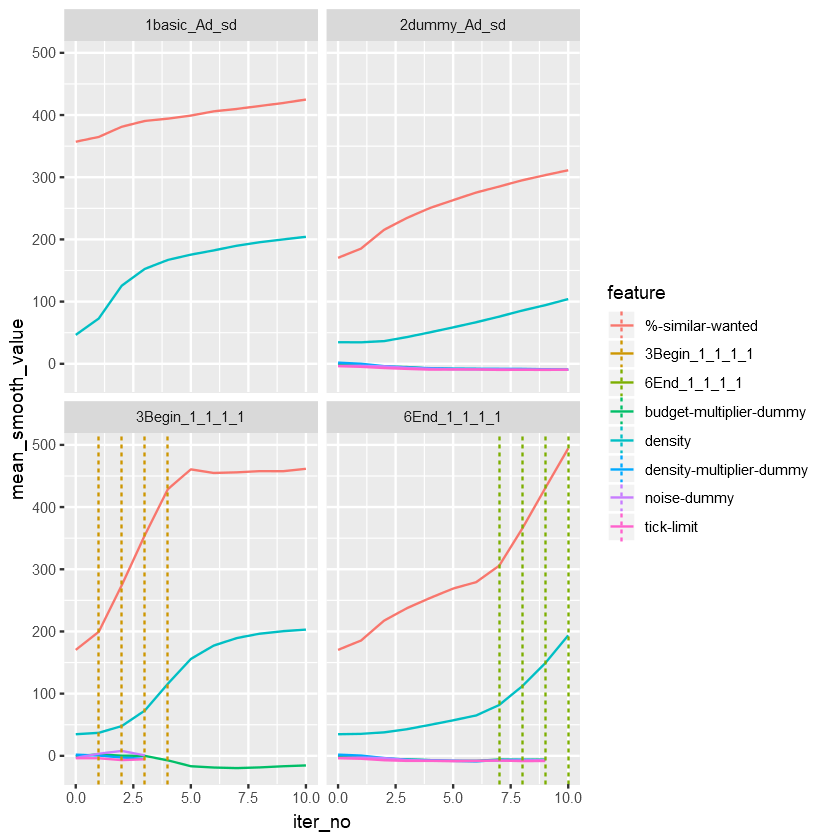

In [24]:
ave_smooth_importance.plot = ggplot(ave_smooth_importance_compare, aes(x = iter_no, y = mean_smooth_value, group=feature, col=feature)) + 
                          geom_line() +
                          facet_wrap(~type) +     
                         # geom_smooth(method = "gam", formula = y ~ poly(x, 3)) +
                          geom_vline(data = elimination_history, aes(xintercept = iter_no,color = type), linetype = "dashed" )
ave_smooth_importance.plot

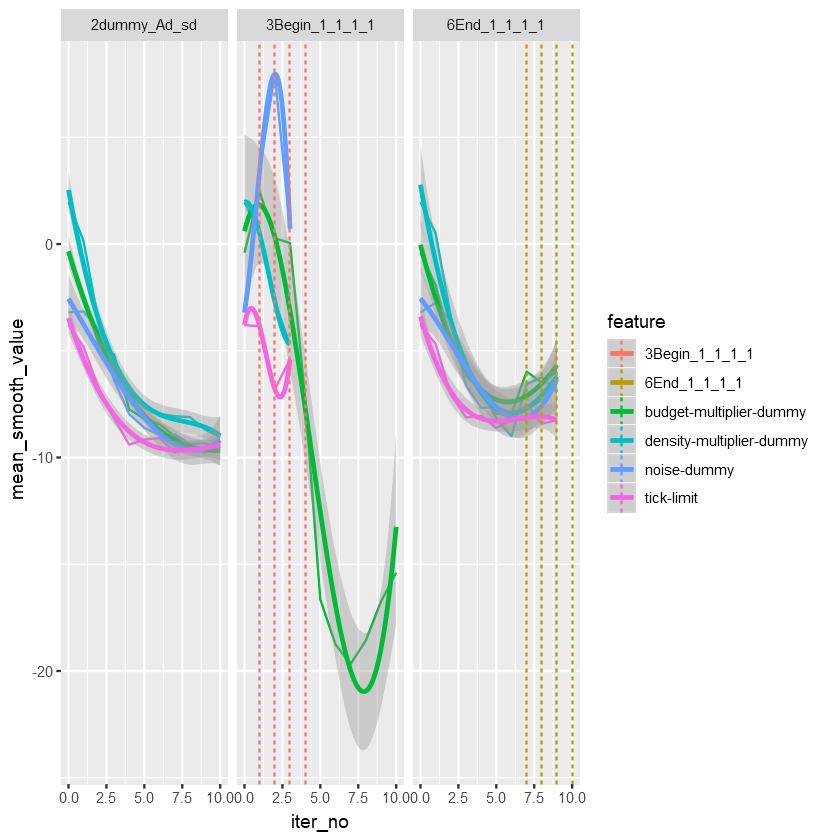

In [25]:
ggplot(ave_smooth_importance_compare[!(feature %in% c("density","%-similar-wanted"))], aes(x = iter_no, y = mean_smooth_value, group=feature, col=feature)) + 
                 geom_line() +
                 facet_wrap(~type) +     
                 geom_smooth(method = "gam", formula = y ~ poly(x, 3)) +
                 geom_vline(data = elimination_history, aes(xintercept = iter_no,color = type), linetype = "dashed" )

## oob error

In [26]:
oob_compare = rbind( data.table(obb_error_Ad.2,type = "2dummy_Ad_sd")
                    ,data.table(obb_error_Ad.3,type = "3Begin_1_1_1_1")
                    ,data.table(obb_error_Ad.4,type = "6End_1_1_1_1")) 

oob_compare = oob_compare[seed %in% seed.focus]
oob_compare[,iter := iter - 1]


In [27]:
ave_oob_compare = oob_compare[,.(mean_obb_error = mean(obb_error)),.(iter,type)]

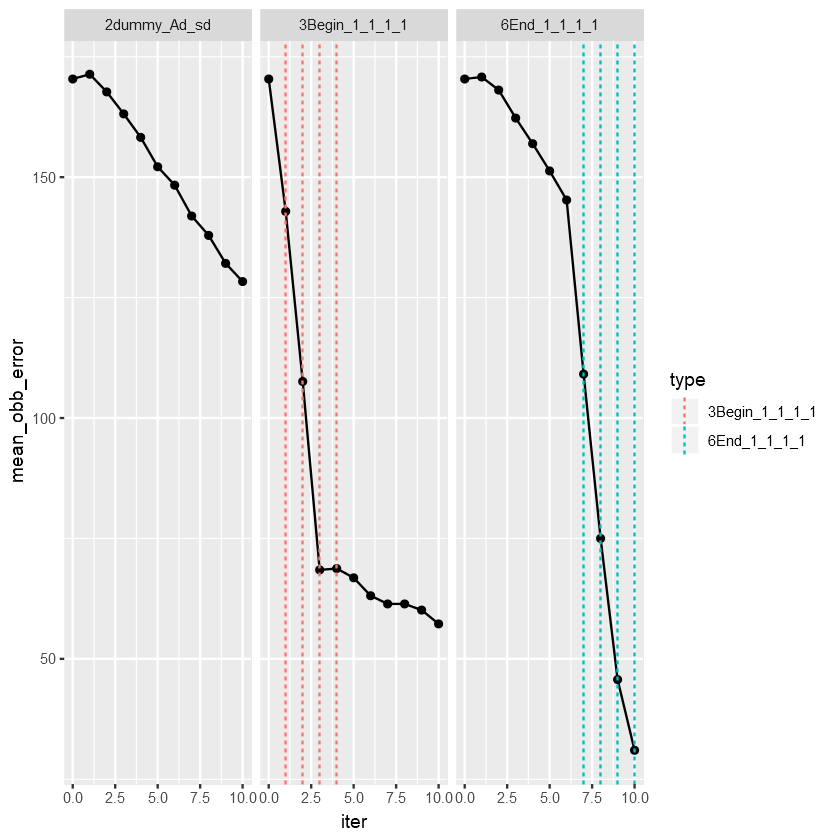

In [48]:
oob.plot = ggplot(data = ave_oob_compare, aes(x = iter, y = mean_obb_error)) + 
                geom_line() + 
                geom_point(data = ave_oob_compare, aes(x = iter, y = mean_obb_error)) +
               # geom_smooth(method = "gam", formula = y ~ poly(x, 3)) + 
                facet_wrap(~type) +
                geom_vline(data = elimination_history, aes(xintercept = iter_no,color = type), linetype = "dashed" )
oob.plot

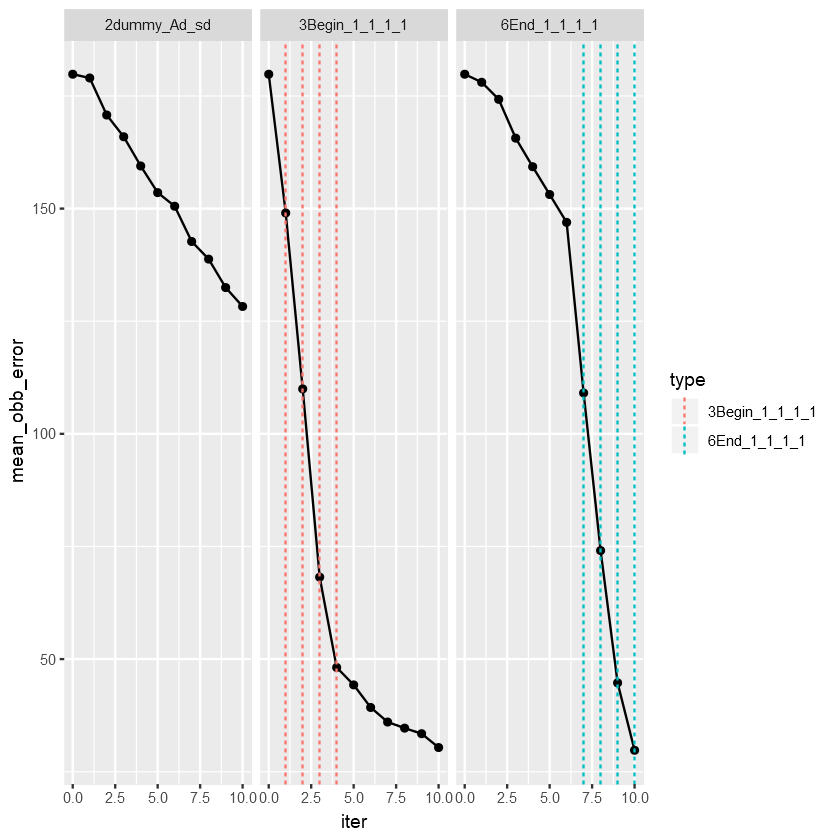

In [49]:
ave_oob_compare = oob_compare[seed != 4,.(mean_obb_error = mean(obb_error)),.(iter,type)]

oob.plot = ggplot(data = ave_oob_compare, aes(x = iter, y = mean_obb_error)) + 
                geom_line() + 
                geom_point(data = ave_oob_compare, aes(x = iter, y = mean_obb_error)) +
               # geom_smooth(method = "gam", formula = y ~ poly(x, 3)) + 
                facet_wrap(~type) +
                geom_vline(data = elimination_history, aes(xintercept = iter_no,color = type), linetype = "dashed" )
oob.plot

# Test Performance

In [29]:
test_ave_compare = rbind(data.table(test_ave_performance_molten_Ad_seq.1, "type" = "1basic_Ad_sd")
                        ,data.table(test_ave_performance_molten_Ad_seq.2, "type" = "2dummy_Ad_sd")
                        ,data.table(test_ave_performance_molten_Ad_seq.3, "type" = "3Begin_1_1_1_1")
                        ,data.table(test_ave_performance_molten_Ad_seq.4, "type" = "6End_1_1_1_1"))

test_ave_compare = test_ave_compare[seed %in% seed.focus]

In [30]:
test_ave_compare = test_ave_compare[,.(errorvalue = mean(errorvalue)),.(iter,errortype,type)]

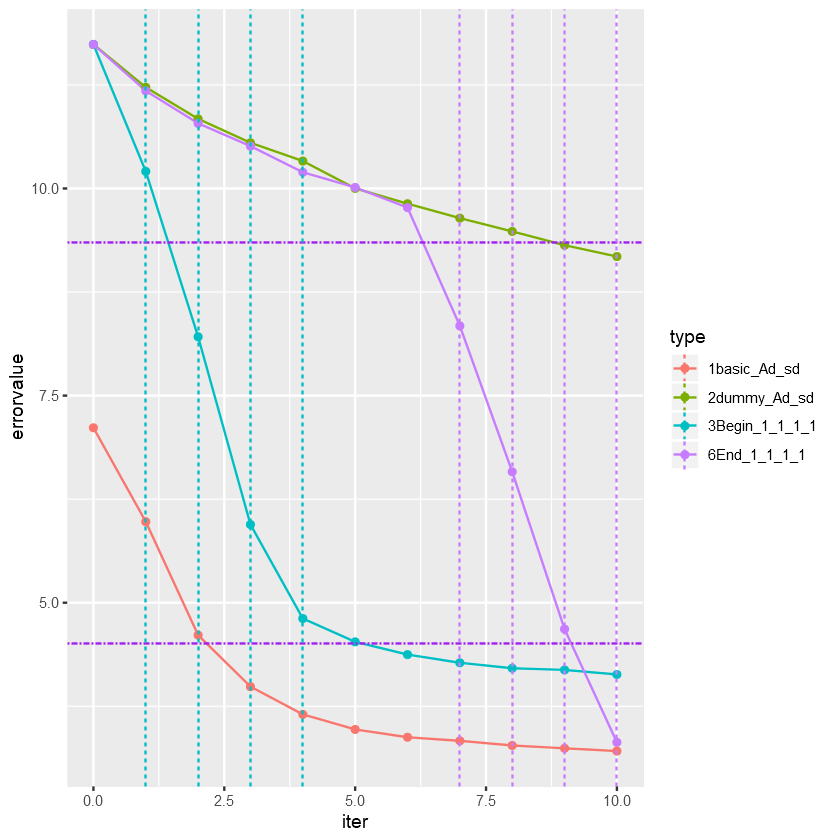

In [31]:
ggplot(data = test_ave_compare[errortype == "rmse"], aes(x = iter, y = errorvalue, group=type, col=type)) +
    geom_line() +
    geom_point(data = test_ave_compare[errortype == "rmse"], aes(x = iter ,y = errorvalue)) +
    geom_hline(data = test_ave_performance_molten_oneshot.1[errortype == "rmse",.(errorvalue = mean(errorvalue)),.(errortype)], aes(yintercept = errorvalue), linetype = "twodash", color = "purple") +
    geom_hline(data = test_ave_performance_molten_oneshot.2[errortype == "rmse",.(errorvalue = mean(errorvalue)),.(errortype)], aes(yintercept = errorvalue), linetype = "twodash", color = "purple") +
    geom_vline(data = elimination_history, aes(xintercept = iter_no,color = type), linetype = "dashed" )
#facet_wrap(~type)

In [32]:
 #importance_compare = rbind(data.table(group_importance_Ad.1,type = "1basic_Ad_sd")
 #                          ,data.table(group_importance_Ad.2,type = "2dummy_Ad_sd")
 #                          ,data.table(group_importance_Ad.3,type = "3Begin_1_1_1_1")
 #                          ,data.table(group_importance_Ad.4,type = "4Begin_4atOnce")
 #                          ,data.table(group_importance_Ad.5,type = "5Begin_2_1_1")
 #                          ,data.table(group_importance_Ad.6,type = "6End_1_1_1_1"))
 #
 #iteration_history_Ad.6 = data.table(unique(iteration_history_Ad.6[,.(iter_no,IsFeatureEliminated,IsDataSelected)])
 #                                    ,"Type" = "End_1_1_1_1")
 #
 #elimination_history = rbind(iteration_history_Ad.3[IsFeatureEliminated==1, .(type = "3Begin_1_1_1_1",iter_no)]
 #                           ,iteration_history_Ad.4[IsFeatureEliminated==1, .(type = "4Begin_4atOnce",iter_no)]
 #                           ,iteration_history_Ad.5[IsFeatureEliminated==1, .(type = "5Begin_2_1_1",iter_no)]
 #                           ,iteration_history_Ad.6[IsFeatureEliminated==1, .(type = "6End_1_1_1_1",iter_no)])
 #
 # geom_vline(data = elimination_history, aes(xintercept = iter_no,color = type), linetype = "dashed" )
 #                          

## other

In [33]:
rmse_bxp_data = rbind(data.table(performance_molten_Rd_seq.1[errortype == "rmse"], sampling = "00Rd_basic", oneshot = "0")
                     ,data.table(performance_molten_oneshot.1[errortype == "rmse",.(iter = 11 ,size,seed,rep,errortype,errorvalue)], sampling = "00Rd_basic",oneshot="1")
                     ,data.table(performance_molten_Rd_seq.2[errortype == "rmse"], sampling = "01Rd_dummy", oneshot = "0")
                     ,data.table(performance_molten_oneshot.2[errortype == "rmse",.(iter = 12 ,size,seed,rep,errortype,errorvalue)], sampling = "01Rd_dummy",oneshot="1")
                     ,data.table(performance_molten_Ad_seq.1[errortype == "rmse"], sampling = "1basic_Ad_sd", oneshot = "0")
                     ,data.table(performance_molten_oneshot.1[errortype == "rmse",.(iter = 11 ,size,seed,rep,errortype,errorvalue)], sampling = "1basic_Ad_sd",oneshot="1")
                     ,data.table(performance_molten_oneshot.2[errortype == "rmse",.(iter = 12 ,size,seed,rep,errortype,errorvalue)], sampling = "1basic_Ad_sd",oneshot="1")
                     ,data.table(performance_molten_Ad_seq.2[errortype == "rmse"], sampling = "2dummy_Ad_sd", oneshot = "0")
                     ,data.table(performance_molten_oneshot.1[errortype == "rmse",.(iter = 11 ,size,seed,rep,errortype,errorvalue)], sampling = "2dummy_Ad_sd",oneshot="1")
                     ,data.table(performance_molten_oneshot.2[errortype == "rmse",.(iter = 12 ,size,seed,rep,errortype,errorvalue)], sampling = "2dummy_Ad_sd",oneshot="1")
                     
                     ,data.table(performance_molten_Ad_seq.3[errortype == "rmse"], sampling = "3Begin_1_1_1_1", oneshot = "0")
                     ,data.table(performance_molten_oneshot.1[errortype == "rmse",.(iter = 11 ,size,seed,rep,errortype,errorvalue)], sampling = "3Begin_1_1_1_1",oneshot="1")
                     ,data.table(performance_molten_oneshot.2[errortype == "rmse",.(iter = 12 ,size,seed,rep,errortype,errorvalue)], sampling = "3Begin_1_1_1_1",oneshot="1")
                     
                     ,data.table(performance_molten_Ad_seq.4[errortype == "rmse"], sampling = "6End_1_1_1_1", oneshot = "0")
                     ,data.table(performance_molten_oneshot.1[errortype == "rmse",.(iter = 11 ,size,seed,rep,errortype,errorvalue)], sampling = "6End_1_1_1_1",oneshot="1")
                     ,data.table(performance_molten_oneshot.2[errortype == "rmse",.(iter = 12 ,size,seed,rep,errortype,errorvalue)], sampling = "6End_1_1_1_1",oneshot="1")     )
ave_rmse_bxp_data = rmse_bxp_data[,.(errorvalue = mean(errorvalue)),.(iter,seed,rep,errortype,sampling,oneshot)]

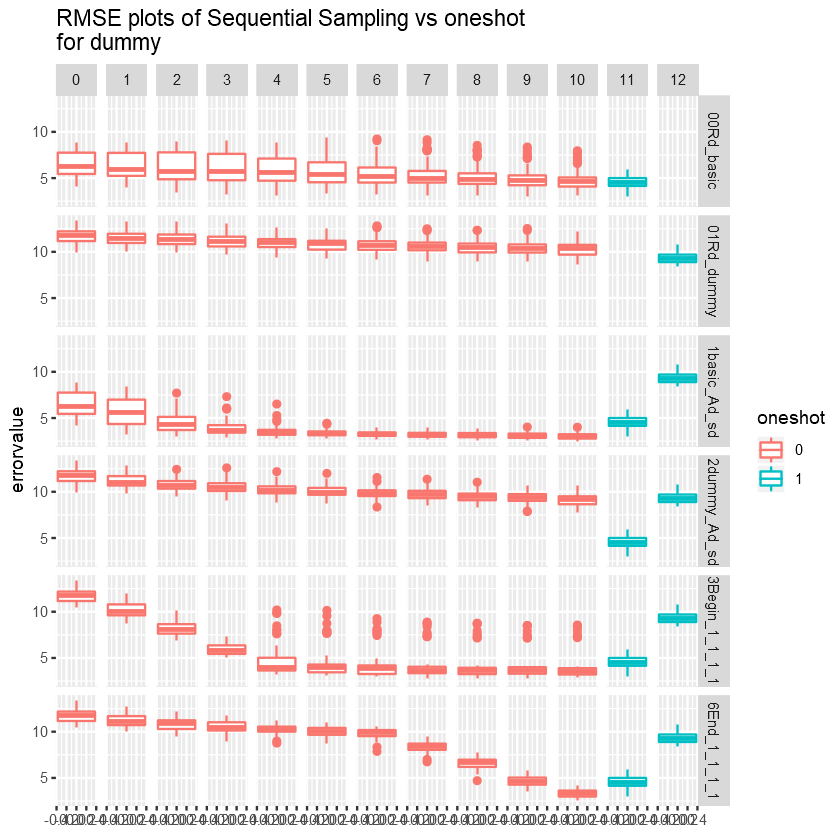

In [34]:
ggplot(ave_rmse_bxp_data[!(sampling %in% c("1Rd_basic","2Rd_dummy"))], aes(y = errorvalue, col=oneshot)) + 
                  geom_boxplot()+
                  facet_grid(sampling~iter) +
                ggtitle(paste0("RMSE plots of Sequential Sampling vs oneshot","\n","for ",model.type.2))

# Special Cases

In [35]:
test_ave_compare.all = rbind(data.table(test_ave_performance_molten_Ad_seq.1, "type" = "1basic_Ad_sd")
                        ,data.table(test_ave_performance_molten_Ad_seq.2, "type" = "2dummy_Ad_sd")
                        ,data.table(test_ave_performance_molten_Ad_seq.3, "type" = "3Begin_1_1_1_1")
                        ,data.table(test_ave_performance_molten_Ad_seq.4, "type" = "6End_1_1_1_1"))

test_ave_compare.all = test_ave_compare.all[seed %in% seed.focus,.(errorvalue = mean(errorvalue)),.(iter,errortype,type,seed)]

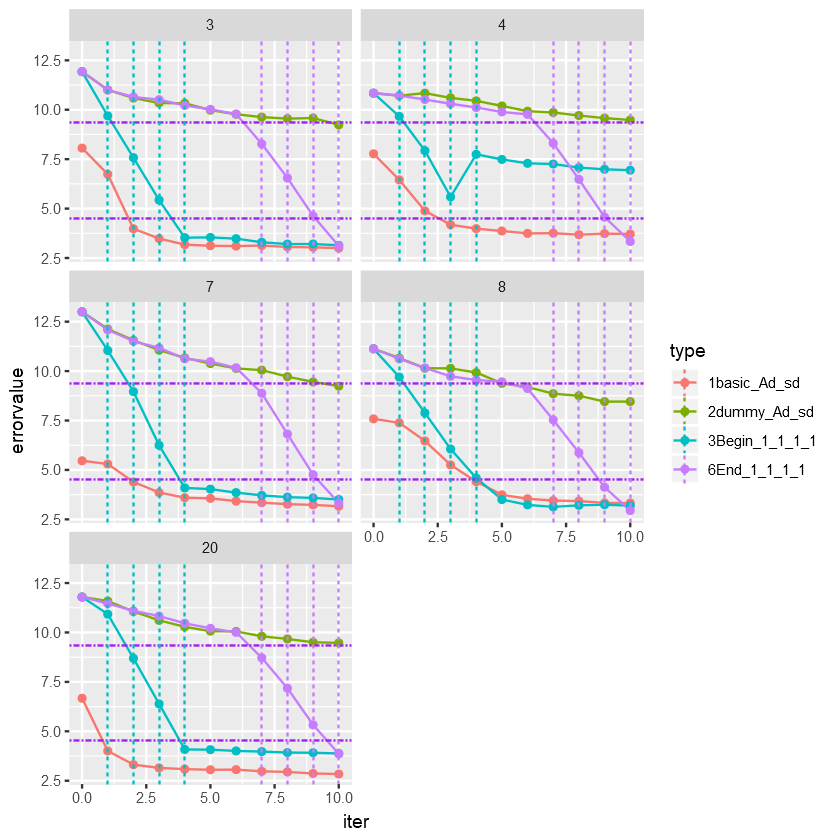

In [36]:
ggplot(data = test_ave_compare.all[errortype == "rmse"], aes(x = iter, y = errorvalue, group=type, col=type)) +
    geom_line() + facet_wrap(~seed, ncol = 2) +
    geom_point(data = test_ave_compare.all[errortype == "rmse" ], aes(x = iter ,y = errorvalue)) +
    geom_hline(data = test_ave_performance_molten_oneshot.1[errortype == "rmse",.(errorvalue = mean(errorvalue)),.(errortype)], aes(yintercept = errorvalue), linetype = "twodash", color = "purple") +
    geom_hline(data = test_ave_performance_molten_oneshot.2[errortype == "rmse",.(errorvalue = mean(errorvalue)),.(errortype)], aes(yintercept = errorvalue), linetype = "twodash", color = "purple") +
    geom_vline(data = elimination_history, aes(xintercept = iter_no,color = type), linetype = "dashed" )


In [50]:
seed.focus

[1]  3  4  7  8 20

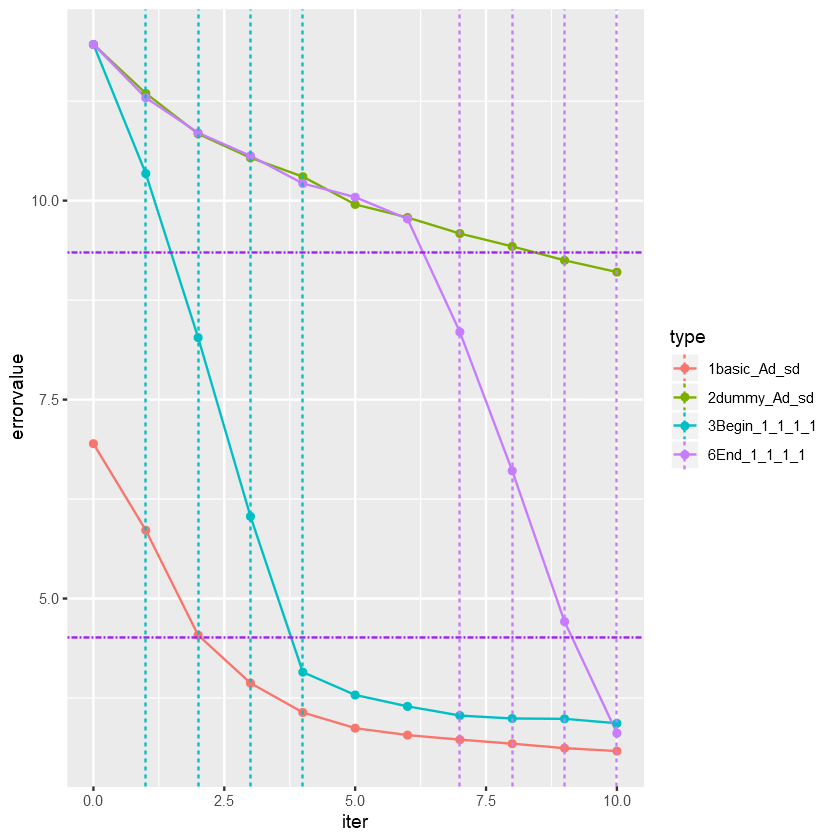

In [37]:
test_ave_compare = rbind(data.table(test_ave_performance_molten_Ad_seq.1, "type" = "1basic_Ad_sd")
                        ,data.table(test_ave_performance_molten_Ad_seq.2, "type" = "2dummy_Ad_sd")
                        ,data.table(test_ave_performance_molten_Ad_seq.3, "type" = "3Begin_1_1_1_1")
                        ,data.table(test_ave_performance_molten_Ad_seq.4, "type" = "6End_1_1_1_1"))

test_ave_compare = test_ave_compare[seed %in% seed.focus]

test_ave_compare = test_ave_compare[seed != 4,.(errorvalue = mean(errorvalue)),.(iter,errortype,type)]

ggplot(data = test_ave_compare[errortype == "rmse"], aes(x = iter, y = errorvalue, group=type, col=type)) +
    geom_line() +
    geom_point(data = test_ave_compare[errortype == "rmse"], aes(x = iter ,y = errorvalue)) +
    geom_hline(data = test_ave_performance_molten_oneshot.1[errortype == "rmse",.(errorvalue = mean(errorvalue)),.(errortype)], aes(yintercept = errorvalue), linetype = "twodash", color = "purple") +
    geom_hline(data = test_ave_performance_molten_oneshot.2[errortype == "rmse",.(errorvalue = mean(errorvalue)),.(errortype)], aes(yintercept = errorvalue), linetype = "twodash", color = "purple") +
    geom_vline(data = elimination_history, aes(xintercept = iter_no,color = type), linetype = "dashed" )
#facet_wrap(~type)

In [38]:
test_ave_compare.all[iter == 5 & errortype == "rmse" & seed == 20]

iter,errortype,type,seed,errorvalue
<dbl>,<fct>,<chr>,<int>,<dbl>
5,rmse,1basic_Ad_sd,20,3.056458
5,rmse,2dummy_Ad_sd,20,10.066676
5,rmse,3Begin_1_1_1_1,20,4.072358
5,rmse,6End_1_1_1_1,20,10.211994


## Mtry = 6 & Seed = 4 & 8

In [39]:
#### Model6.2 ####
one_shot_path6.2 = paste0(outputs.path.2,"oneshot_mtry6/")

obb_error_oneshot6.2         = fread(paste0(one_shot_path6.2,model.type.2,"_obb_error_oneshot_all",".csv"))
performance_table_oneshot6.2 = fread(paste0(one_shot_path6.2,model.type.2,"_performance_table_oneshot",".csv"))
#predictedLabels_oneshot6.2   = fread(paste0(one_shot_path6.2,model.type6.2,"_predictedLabels_oneshot_all",".csv")) # size

performance_table_oneshot6.2 = performance_table_oneshot6.2[size == 100]
performance_molten_oneshot6.2 <- melt(data = performance_table_oneshot6.2
                             , id.vars = c('iter',"seed","rep","size"))
setnames(performance_molten_oneshot6.2, c("variable","value"),c("errortype","errorvalue"))

test_ave_performance_molten_oneshot6.2 = performance_molten_oneshot6.2[,.(errorvalue = mean(errorvalue)),.(iter,seed,rep,errortype)]

In [40]:
Ad_path6.2     = paste0(folder.path,"outputs_FeatSel_mtry6_seed4_8_ElimBeginning_1_1_1_1_2020-03-06","/")
model.type6.2  = "dummy"

obb_error_Ad6.2              = fread(paste0(Ad_path6.2,model.type6.2,"_obb_error_AdFe_sd",".csv"))
performance_table_Ad6.2      = fread(paste0(Ad_path6.2,model.type6.2,"_performance_table_AdFe_sd",".csv"))
importance_Ad6.2             = fread(paste0(Ad_path6.2,model.type6.2,"_importance_table_AdFe_sd",".csv"))
FinalTrainData_Ad6.2         = fread(paste0(Ad_path6.2,model.type6.2,"_FinalTrainData_AdFe_sd",".csv"))
train_candidates_Ad6.2       = fread(paste0(Ad_path6.2,model.type6.2,"_train_candidates_table_AdFe_sd",".csv"))

performance_table_Ad6.2 = performance_table_Ad6.2[size == 100]
performance_molten_Ad_seq6.2 <- melt(data = performance_table_Ad6.2
                             , id.vars = c('iter',"seed","rep","size"))
performance_molten_Ad_seq6.2[, iter := iter - 1]
setnames(performance_molten_Ad_seq6.2, c("variable","value"),c("errortype","errorvalue"))

test_ave_performance_molten_Ad_seq6.2 = performance_molten_Ad_seq6.2[,.(errorvalue = mean(errorvalue)),.(iter,seed,rep,errortype)]

importance_Ad6.2[, iter_no := iter_no - 1]
group_importance_Ad6.2 = melt(data = importance_Ad6.2, id.vars = c("seed","rep","iter_no"), measure.vars = feature_names.2) 
setnames(group_importance_Ad6.2, c("variable"),c("feature"))


### Test

In [41]:
test_ave_compare.mtry = rbind(data.table(test_ave_performance_molten_Ad_seq.1, "type" = "1basic_Ad_sd")
                        ,data.table(test_ave_performance_molten_Ad_seq.2, "type" = "2dummy_Ad_sd")
                        ,data.table(test_ave_performance_molten_Ad_seq.3, "type" = "3Begin_1_1_1_1")
                     #   ,data.table(test_ave_performance_molten_Ad_seq.4, "type" = "6End_1_1_1_1")
                        ,data.table(test_ave_performance_molten_Ad_seq6.2, "type" = "7Begin_mtry6"))

test_ave_compare.mtry = test_ave_compare.mtry[seed %in% c(4,8)]
test_ave_compare.mtry = test_ave_compare.mtry[,.(errorvalue = mean(errorvalue)),.(iter,errortype,type,seed)]

In [42]:
oneshot_performance_molten.mtry = rbind(data.table(test_ave_performance_molten_oneshot.1, type = "1basic_Ad_sd")
                                  ,data.table(test_ave_performance_molten_oneshot.2, type = "2dummy_Ad_sd")
                                  ,data.table(test_ave_performance_molten_oneshot6.2, type = "7Begin_mtry6"))
oneshot_performance_molten.mtry = oneshot_performance_molten.mtry[,.(errorvalue = mean(errorvalue)),.(iter,errortype,type)]

In [43]:


#ggplot(data = test_ave_compare[errortype == "rmse"], aes(x = iter, y = errorvalue, group=type, col=type)) +
#    geom_line() + facet_wrap(~seed)
#    geom_point(data = test_ave_compare[errortype == "rmse"], aes(x = iter ,y = errorvalue)) +
#    geom_hline(data = test_ave_performance_molten_oneshot.1[errortype == "rmse",.(errorvalue = mean(errorvalue)),.(errortype)], aes(yintercept = errorvalue), linetype = "twodash", color = "purple") +
#    geom_hline(data = test_ave_performance_molten_oneshot.2[errortype == "rmse",.(errorvalue = mean(errorvalue)),.(errortype)], aes(yintercept = errorvalue), linetype = "twodash", color = "purple") +
#    geom_vline(data = elimination_history, aes(xintercept = iter_no,color = type), linetype = "dashed" )
##facet_wrap(~type)

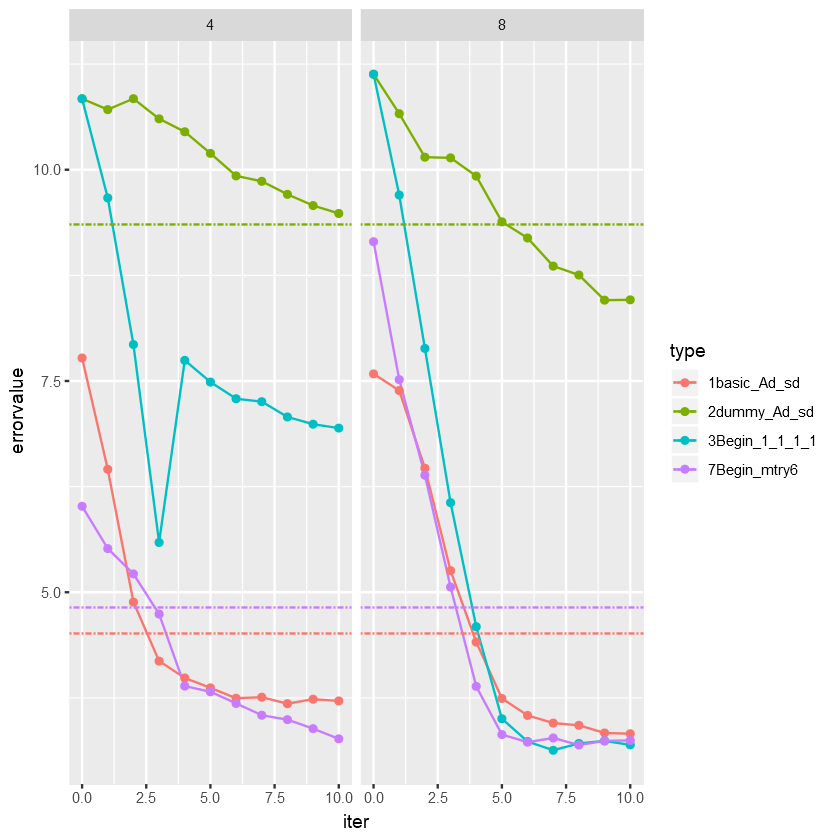

In [44]:
ggplot(data = test_ave_compare.mtry[errortype == "rmse"], aes(x = iter, y = errorvalue, group=type, col=type)) +
    geom_line() + facet_wrap(~seed) +
    geom_point(data = test_ave_compare.mtry[errortype == "rmse"], aes(x = iter ,y = errorvalue)) +
    geom_hline(data = oneshot_performance_molten.mtry[errortype == "rmse",.(errorvalue = mean(errorvalue)),.(errortype,type)], aes(yintercept = errorvalue , color = type), linetype = "twodash") 

#geom_hline(data = test_ave_performance_molten_oneshot4.2[errortype == "rmse",.(errorvalue = mean(errorvalue)),.(errortype)], aes(yintercept = errorvalue), linetype = "twodash", color = "green") +
#geom_hline(data = test_ave_performance_molten_oneshot3.2[errortype == "rmse",.(errorvalue = mean(errorvalue)),.(errortype)], aes(yintercept = errorvalue), linetype = "twodash", color = "blue") +    
#geom_hline(data = test_ave_performance_molten_oneshot.2[errortype == "rmse",.(errorvalue = mean(errorvalue)),.(errortype)], aes(yintercept = errorvalue), linetype = "twodash", color = "purple") 
   # geom_vline(data = elimination_history, aes(xintercept = iter_no,color = type), linetype = "dashed" )
#facet_wrap(~type)